# Lanzamiento de un proyectil desde un avión

## Inicialización de Variables

Todas las variables que se piden como entrada.

In [1294]:
import matplotlib.pyplot as plt
import numpy as np

h_avion = 1000
d_lanzamiento = 300
h_canion = 950
a = 60
angulo = np.radians(a)
l_canion = 1400

g = 9.81
v0 = 229

## Superficie

Con esto se dibuja la forma del suelo y el cañón.

In [1295]:
def f_lineal(m, b, x):
    return m * x + b

In [1296]:
A = 0.5 * d_lanzamiento
Xa = [0, A]
Ya = [0, 0]

b = d_lanzamiento
B = A + b
Xb = [A, B]
Yb = [0, 0]

c = h_canion / np.tan(angulo)
C = B + c
mc = np.tan(np.pi - angulo)
c_corte = B * np.tan(angulo)
yc = f_lineal(mc, c_corte , C)
Xc = [B, C]
Yc = [0, yc]

D = C + l_canion
Xd = [C, D]
Yd = [-h_canion, -h_canion]

E = D + c
me = -mc
e_corte = -E * np.tan(angulo)
ye = f_lineal(me, e_corte, E)
Xe = [D, E]
Ye = [-h_canion, ye]

#f = A
#F = E + f
#Xf = [E, F]
#Yf = [0, 0]

## Colisión

### Colisión en rectas constantes (3)

Es el primer caso para encontrar el punto de colisión.

La ecuación se obtiene de despejar la ecuación de la trayectoria $y(x)$ a su versión de $x(y)$.
* Suelo: $y = 0$
* Cañón: $y = -h_{canion}$

In [1297]:
def xrecta(y):
    return np.sqrt(((2 * v0**2) / g) * (h_avion - y)) + A

Con este valor ya se consigue el punto exacto de colisión en las lineas horizontales de la superficie.

Sería un sistema de ecuaciones entre:
* Ec. trayectoria: $y = [...]x^2$
* Exuacion constante: $x = n$

Pero, solo es reemplazo al ojo.


### Colisión en diagonales (2)

In [1298]:
def resolver_cuadratica(a, b, c):
    discriminante = b**2 - 4 * a * c

    #if discriminante < 0:
    #    return "No hay soluciones reales"

    raiz_discriminante = np.sqrt(discriminante)
    x1 = (-b + raiz_discriminante) / (2 * a)
    #x2 = (-b - raiz_discriminante) / (2 * a)

    #return (x1, x2) if x1 != x2 else (x1,)
    return x1

## Casos

In [1299]:
def velocidad_max(x, y):
    return np.sqrt(g/(2 * (h_avion - y))) * (x - A)

vb_max = velocidad_max(B, 0)
vc_max = velocidad_max(C, - h_canion)
vd_max = velocidad_max(D, -h_canion)
ve_max = velocidad_max(E, 0)

if 0 < v0 <= vb_max:
    x_b = xrecta(0)
    y_b = 0
    colision = [x_b, y_b]
elif vb_max < v0 <= vc_max:
    a = g / (2 * v0**2)
    b = mc - ((g * A) / (v0**2))
    c = (g / (2 * v0**2)) * A**2 + c_corte - h_avion

    x_c = resolver_cuadratica(a, b, c)
    y_c = f_lineal(mc, c_corte, x_c)
    colision = [x_c, y_c]
elif vc_max < v0 <= vd_max:
    x_d = xrecta(-h_canion)
    y_d = -h_canion
    colision = [x_d, y_d]
elif vd_max < v0 <= ve_max:
    a = g / (2 * v0**2)
    b = me - ((g * A) / (v0**2))
    c = (g / (2 * v0**2)) * A**2 + e_corte - h_avion

    x_e = resolver_cuadratica(a, b, c)
    y_e = f_lineal(me, e_corte, x_e)
    colision = [x_e, y_e]
else:
    x_f = xrecta(0)
    y_f = 0
    colision = [x_f, y_f]

## Trayectoria

In [1300]:
def trayectoria(x):
    return h_avion - (g / (2 * v0**2)) * (x - A) ** 2

In [1301]:
xs = np.linspace(A, colision[0], 100)
ys = trayectoria(xs)

## Límite de la gráfica

In [ ]:
f = A
F = E + f

if F < colision[0]:
    F = colision[0] + f 

Xf = [E, F]
Yf = [0, 0]

## Plot

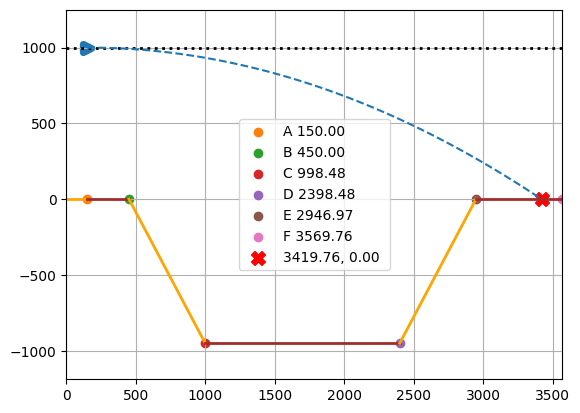

In [1303]:
plt.scatter(A, h_avion, marker=">", linewidth=5)
plt.plot(Xa, Ya, color="orange", linewidth=2)
plt.scatter(A, 0, label=f"A {A:.2f}")
plt.plot(Xb, Yb, color="brown", linewidth=2)
plt.scatter(B, 0, label=f"B {B:.2f}")
plt.plot(Xc, Yc, color="orange", linewidth=2)
plt.scatter(C, yc, label=f"C {C:.2f}")
plt.plot(Xd, Yd, color="brown", linewidth=2)
plt.scatter(D, -h_canion, label=f"D {D:.2f}")
plt.plot(Xe, Ye, color="orange", linewidth=2)
plt.scatter(E, 0, label=f"E {E:.2f}")
plt.plot(Xf, Yf, color="brown", linewidth=2)
plt.scatter(F, 0, label=f"F {F:.2f}")

plt.axhline(h_avion, linestyle=":", color="black", linewidth=2)


# plt.scatter(x1, y1, marker="X", s=100, color="red", label="Colisión")
plt.scatter(
    colision[0],
    colision[1],
    marker="X",
    s=100,
    color="red",
    label=f"{colision[0]:.2f}, {colision[1]:.2f} ",
)

plt.plot(xs, ys, linestyle="--")

plt.xlim(0, F)
plt.ylim(-1.25 * h_canion, 1.25 * h_avion)
plt.legend()
plt.grid()
plt.show()